In [78]:
import random
import string
random.seed(10)
alphabet = string.ascii_lowercase + " "
target = "bigdog"
population_size = 100
import time
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

In [64]:
class InitialPool:
    def __init__(self):
        self.specimans = []
        self.fitnesses = []
        for i in range(population_size):
            speciman = ""
            for j in range(len(target)):
                speciman += random.choice(alphabet)
            self.specimans.append(speciman)
            self.fitnesses.append(2**(sum(x==y for x,y in zip(self.specimans[i], target))))
            
            
mutationRate = 0.05
class ChildPool:
    def __init__(self, parent):
        self.specimans = []
        self.fitnesses = []
        for i in range(population_size):
            p1, p2 = random.choices(parent.specimans, parent.fitnesses, k=2)
            child = ""
            for j in range(len(target)):
                if (random.random() < mutationRate):
                    child += random.choice(alphabet)
                else:
                    child += random.choice([p1[j], p2[j]])
                    
            self.specimans.append(child)    
            self.fitnesses.append(2**(sum(x==y for x,y in zip(self.specimans[i], target))))
    

In [80]:
pool = InitialPool()
total_fitness = 0

for i in range(len(pool.fitnesses)):
    total_fitness += pool.fitnesses[i]

# normalize fitness
for i in range(len(pool.fitnesses)):
    pool.fitnesses[i] /= total_fitness

foundTarget = (target in pool.specimans)
generation = 0
highest_fitness = 0
highest_fitness_speciman = ""
start = time.time()
while not foundTarget:
    generation += 1
    newPool = ChildPool(pool)
    foundTarget = (target in newPool.specimans)

    if not foundTarget:
        total_fitness = 0
        for i in range(len(newPool.fitnesses)):
            total_fitness += newPool.fitnesses[i]
            if (newPool.fitnesses[i] > highest_fitness):
                highest_fitness = newPool.fitnesses[i]
                highest_fitness_speciman = newPool.specimans[i]

        print("Most fit:", highest_fitness_speciman, "| Generation:", generation)
        # normalize fitness
        for i in range(len(newPool.fitnesses)):
            newPool.fitnesses[i] /= total_fitness
        pool = newPool
end = time.time()
print("Found " + target                                                                                                                                                                                                                                            + " in Generation " + str(generation))
print("Time elpased:", end - start, "seconds.")

Most fit: uigmhq | Generation: 1
Most fit: kildgg | Generation: 2
Most fit: kildgg | Generation: 3
Most fit: kigdmg | Generation: 4
Most fit: kigdmg | Generation: 5
Most fit: digdog | Generation: 6
Most fit: digdog | Generation: 7
Most fit: digdog | Generation: 8
Found bigdog in Generation 9
Time elpased: 0.023983240127563477 seconds.


In [52]:
time_data = np.zeros((3, 5, 10))
gen_data = np.zeros((3, 5, 10))

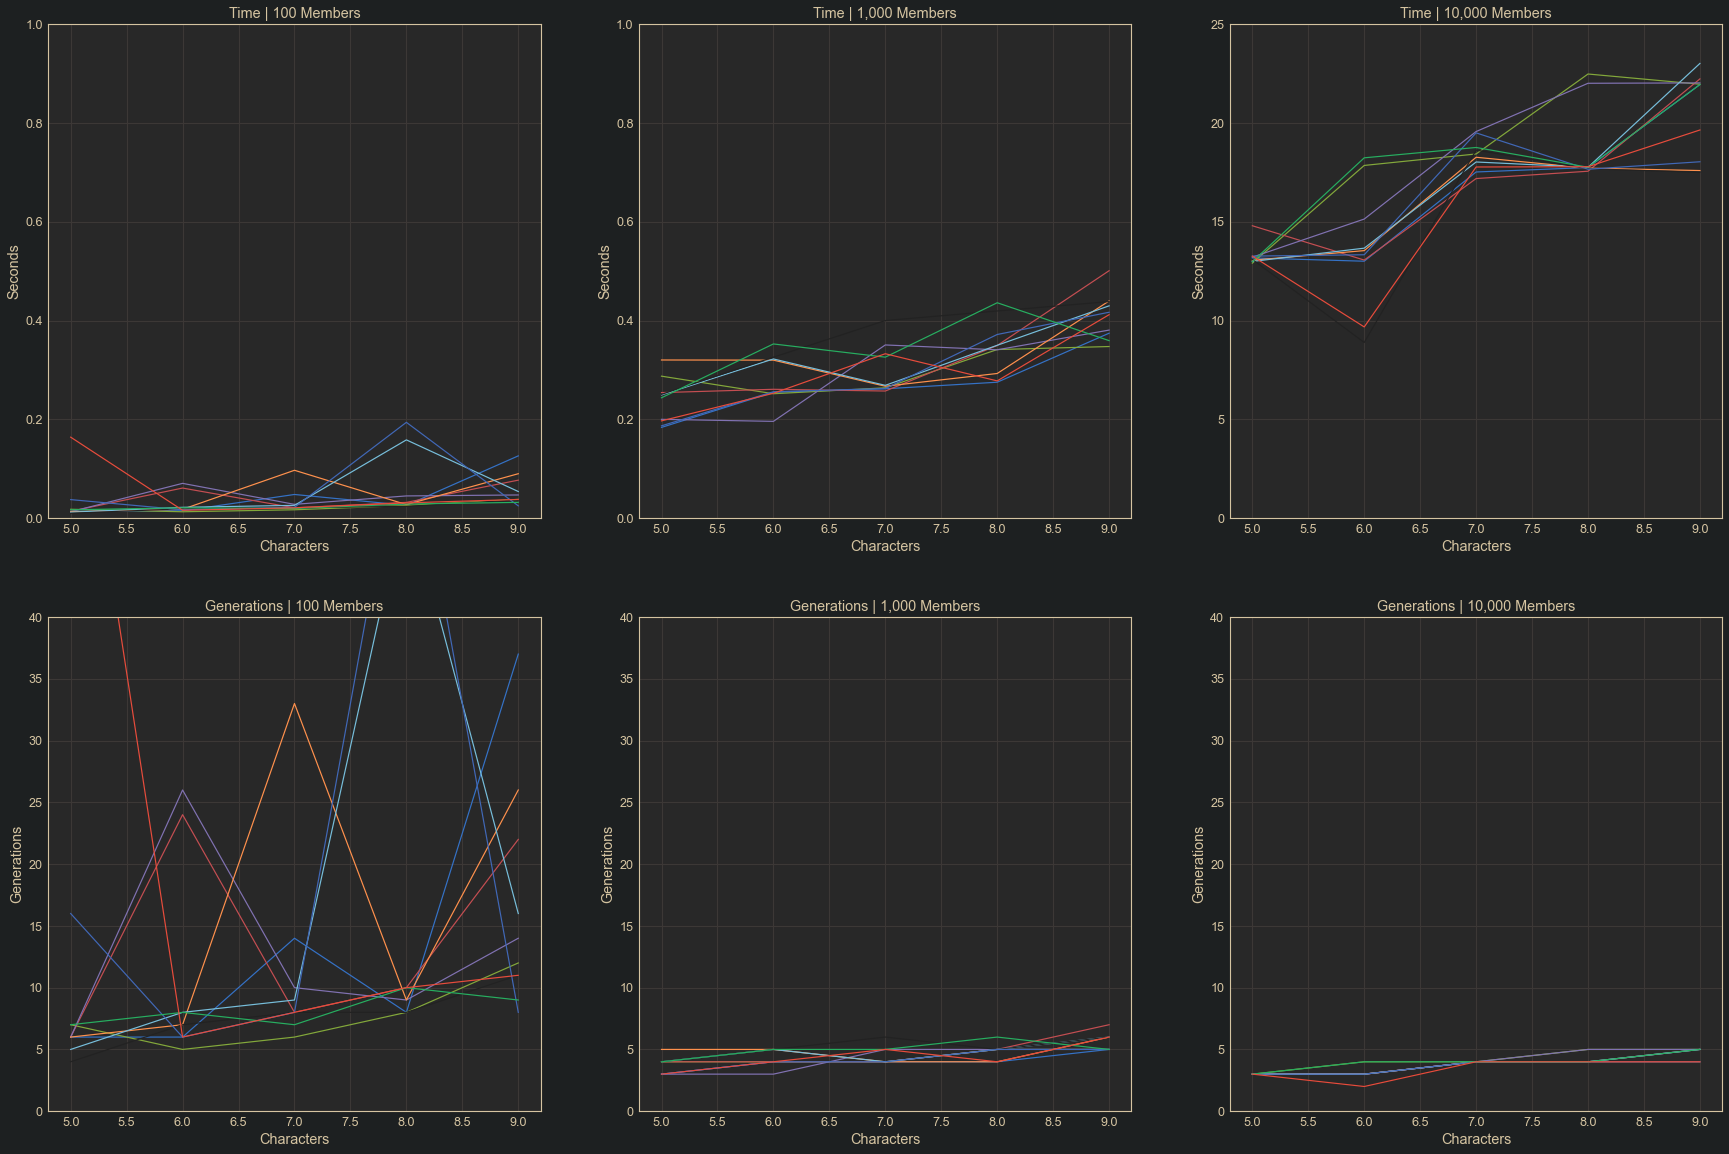

In [38]:
#time graphs
x_ax = [i for i in range(5,10)]
fig = plt.figure(figsize = (30,20))
axs = fig.subplots(nrows=2, ncols=3)

axs[0,0].plot(x_ax, time_data[0])
axs[0,0].set_title("Time | 100 Members")
axs[0,0].set_ylim([0, 1])
axs[0,0].set_xlabel("Characters")
axs[0,0].set_ylabel("Seconds")

axs[1,0].plot(x_ax, gen_data[0])
axs[1,0].set_title("Generations | 100 Members")
axs[1,0].set_ylim([0,40])
axs[1,0].set_xlabel("Characters")
axs[1,0].set_ylabel("Generations")


axs[0,1].plot(x_ax, time_data[1])
axs[0,1].set_title("Time | 1,000 Members")
axs[0,1].set_ylim([0, 1])
axs[0,1].set_xlabel("Characters")
axs[0,1].set_ylabel("Seconds")

axs[1,1].plot(x_ax, gen_data[1])
axs[1,1].set_title("Generations | 1,000 Members")
axs[1,1].set_ylim([0,40])
axs[1,1].set_xlabel("Characters")
axs[1,1].set_ylabel("Generations")


axs[0,2].plot(x_ax, time_data[2])
axs[0,2].set_title("Time | 10,000 Members")
axs[0,2].set_ylim([0, 25])
axs[0,2].set_xlabel("Characters")
axs[0,2].set_ylabel("Seconds")

axs[1,2].plot(x_ax, gen_data[2])
axs[1,2].set_title("Generations | 10,000 Members")
axs[1,2].set_ylim([0,40])
axs[1,2].set_xlabel("Characters")
axs[1,2].set_ylabel("Generations")

#plt.xticks(np.arange(0, 10, 1.0))

plt.savefig("2.png")

In [ ]:
for x in range(3):
    population_size = 10**(x+2)
    for y in range(5):
        for z in range(10):
            target = ""
            for i in range(5+y):
                target += random.choice(alphabet)
            pool = InitialPool()

            total_fitness = 0
            for i in range(len(pool.fitnesses)):
                total_fitness += pool.fitnesses[i]

            # normalize fitness
            for i in range(len(pool.fitnesses)):
                pool.fitnesses[i] /= total_fitness

            foundTarget = (target in pool.specimans)
            generation = 0
            highest_fitness = 0
            highest_fitness_speciman = ""
            start = time.time()
            while not foundTarget:
                generation += 1
                newPool = ChildPool(pool)
                foundTarget = (target in newPool.specimans)

                if not foundTarget:
                    total_fitness = 0
                    for i in range(len(newPool.fitnesses)):
                        total_fitness += newPool.fitnesses[i]
                        if (newPool.fitnesses[i] > highest_fitness):
                            highest_fitness = newPool.fitnesses[i]
                            highest_fitness_speciman = newPool.specimans[i]

                    print("Most fit:", highest_fitness_speciman, "| Generation:", generation)
                    # normalize fitness
                    for i in range(len(newPool.fitnesses)):
                        newPool.fitnesses[i] /= total_fitness
                    pool = newPool
            end = time.time()
            print("Found " + target + " in Generation " + str(generation))
            print("Time elpased:", end - start, "seconds.")
            time_data[x][y][z] = end - start
            gen_data[x][y][z] = generation